In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
from wordcloud import WordCloud
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cegut\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cegut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cegut\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
observaciones = pd.read_excel('D:/jupyter/dane/datos_crudos/eas_observacionesmodulos_2022.xlsx')

In [5]:
observaciones = observaciones.rename(columns = lambda x:x.lower())

In [6]:
observaciones.head()

,id,fecha,observacion,titulo,nombre,idnoremp,periodo
0,14377,2023-09-04 22:24:10.0,Se ajustan salarios personal directo sobre el ...,Módulo II,PORRAS VARGAS MARIA ELVIRA,10209145,2022
1,14378,2023-09-04 22:18:09.0,Se corrige gastos en 8. Contribuciones y afil...,Módulo III,PORRAS VARGAS MARIA ELVIRA,10209145,2022
2,14404,2023-09-05 01:12:59.0,Se ajusta el total de número de empleados prom...,Módulo V,PORRAS VARGAS MARIA ELVIRA,10209145,2022
3,14394,2023-09-05 00:47:50.0,Se corrige pregunta 3 se contacta la fuente ví...,Módulo VI,PORRAS VARGAS MARIA ELVIRA,10209145,2022
4,14379,2023-09-04 22:22:31.0,Se corrige cifras monetaria valor energía eléc...,Módulo VII,PORRAS VARGAS MARIA ELVIRA,10209145,2022


In [7]:
observaciones.isnull().sum()

id             0
fecha          0
observacion    1
titulo         0
nombre         0
idnoremp       0
periodo        0
dtype: int64

## Análisis de la columna observaciones

In [8]:
# Menor cantidad de caracteres de una sentencia y su formato
min_index = observaciones['observacion'].str.len().idxmin()
min_frase = observaciones.loc[min_index, 'observacion']
min_frase_length = len(min_frase)
print(f"El tamaño de la menor frase es {min_frase_length} caracteres y es: {min_frase}")

El tamaño de la menor frase es 1 caracteres y es: .


In [9]:
# Menor cantidad de caracteres de una sentencia y su formato
max_index = observaciones['observacion'].str.len().idxmax()
max_frase = observaciones.loc[max_index, 'observacion']
max_frase_length = len(max_frase)
print(f"El tamaño de la menor frase es {max_frase_length} caracteres y es: {max_frase}")

El tamaño de la menor frase es 3885 caracteres y es: Módulo - TICBuenas tardes señor FabianInformo se diligencio el formato de justificación  por parte de la empresa AGECOLDEX SA indicando el motivo de las variaciones. Del mismo modo autorizado al monitor a realizar las correcciones pertinentes.Segun informacion suministrada por la fuente a cargo de la señora Lina Marcela Gonzalez Mosquera coordinadora contable se hace la correcciones en este módulo en base a la información recibida el día 29/08/2023 por correo del formato Excel enviado por el link (https://1drv.ms/x/s!ArEfMP3K1jJ3syM3FpQMl5JmGc5_) a los correos CONTABILIDAD@AGECOLDEX.COM - AJROJAS@AGECOLEX.COM - lmgonzalez@agecolda.com de la siguiente manera:Punto 1 1. Indique si a 31 de diciembre el 2022 el personal ocupado promedio de su empresa registrado en el Módulo II renglon 7 (Renglón 8 para educación superior) usó alguno de los siguientes bienes TIC suministrados por la empresa. Si su respuesta es afirmativa especifique el nú

In [10]:
# Amplitd de la cantidad de caracteres de las observaciones
amp_tot = max_frase_length - min_frase_length
amp_tot

3884

In [11]:
observaciones.size

9856

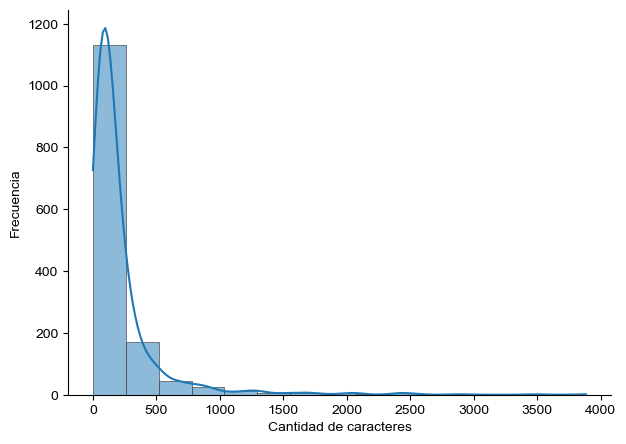

In [12]:
# Tamaño del vector columna
size = observaciones.size

## Número de grupos
k = math.ceil(1 + 3.3 * math.log10(size))

# Amplitud de cada clase
amp = amp_tot / k

# Histograma

f, ax = plt.subplots(figsize = (7, 5))
sns.despine(f)
sns.set_style('whitegrid')

observaciones['tamaño'] = observaciones['observacion'].str.len()

sns.histplot(
    observaciones,
    x = 'tamaño',
    bins = k,
    binwidth = amp,
    edgecolor = '.3',
    linewidth = .5,
    kde = True,
)

ax.set_ylabel('Frecuencia')
ax.set_xlabel('Cantidad de caracteres')

ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())

In [15]:
observaciones.dtypes

id               int64
fecha           object
observacion     object
titulo          object
nombre          object
idnoremp         int64
periodo          int64
tamaño         float64
dtype: object

In [16]:
observaciones['observacion'] = observaciones['observacion'].astype(str)

### Nube de palabras más frecuentes

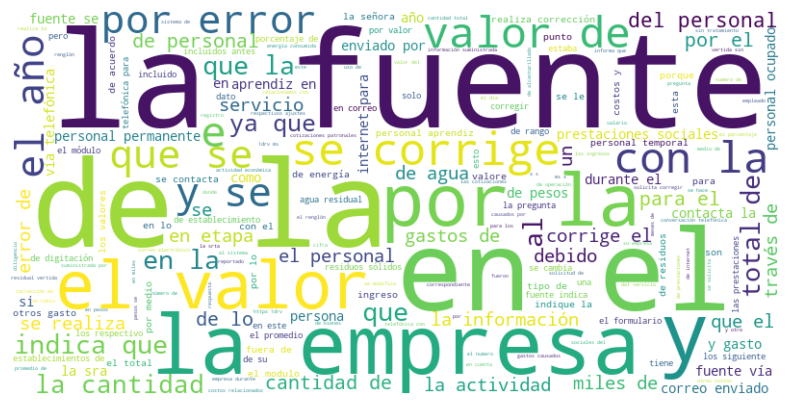

In [18]:
# Palabras más frecuentes en el pre-procesado

# Colocando las palabras en minúsculas
palabras_minusculas = [word.lower() for word in observaciones['observacion']]

# Juntando todas las palabras en un unico string
text = ''.join(palabras_minusculas)

#Creando la nube de palabras
nube = WordCloud(width = 800, height = 400, background_color = 'white').generate(text)

plt.figure(figsize = (10, 5))
plt.imshow(nube, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [20]:
# Alterar mayúsculas por minúsculas
def minuscula(text):
    
    return text.lower()

observaciones['texto_limpio'] = observaciones['observacion'].apply(minuscula)

In [24]:
#Remover Puntuación
def remover_puntuacion(texto):
    return re.sub(r'[^\w\s]', '', texto)
observaciones['texto_limpio'] = observaciones['texto_limpio'].apply(remover_puntuacion)

In [25]:
# Remover números
def remover_numeros(texto):
    return re.sub(r'\d+', '', texto)

observaciones['texto_limpio'] = observaciones['texto_limpio'].apply(remover_numeros)

In [27]:
# Remover espacios
def remover_espacos(text):
    return text.replace("\n","").replace("\r","")

observaciones['texto_limpio'] = observaciones['texto_limpio'].apply(remover_espacos)

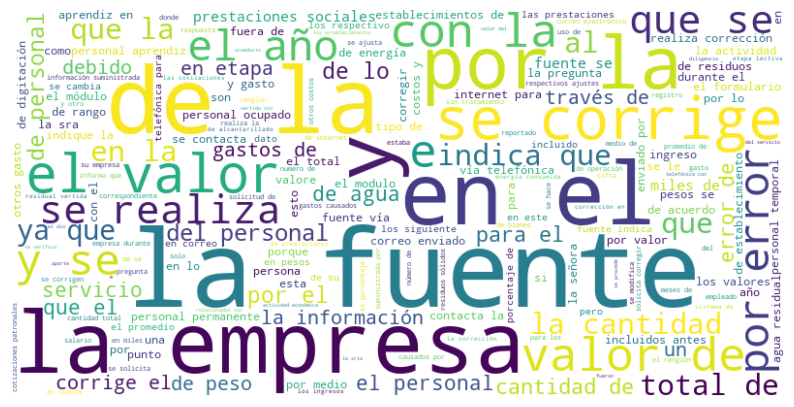

In [29]:
# Juntar as frases para criar uma string única
all_text = ' '.join(observaciones.texto_limpio)

# Criar um objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', random_state=21, max_font_size=110).generate(all_text)

# Exibir a imagem da nuvem de palavras
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()